In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale
import seaborn as sns
from random import choice
from math import floor
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [437]:
file = pd.read_csv('/Users/ciaranmacdermott/Documents/GitHub/Ciaran_ironhack_excercises/Kaggle_DataScience.csv')
df = pd.DataFrame(file)
df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,0,58,111,84.5,GSK,MA,191,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,0,72,133,102.5,Eventbrite,TN,15,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,0,56,91,73.5,Software Engineering Institute,PA,37,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,0,95,160,127.5,"Numeric, LLC",PA,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [438]:
df = df.drop("index",axis=1)
print(df.shape, df.drop_duplicates().shape)

(742, 41) (467, 41)


In [439]:
df = df.drop_duplicates()

In [440]:
#sns.pairplot(df)
#we looked for interesting correlations in intital EDA.
#The pairplot contained many varibales so this was removed thereafter as it slowed the projectdown too much

<AxesSubplot:>

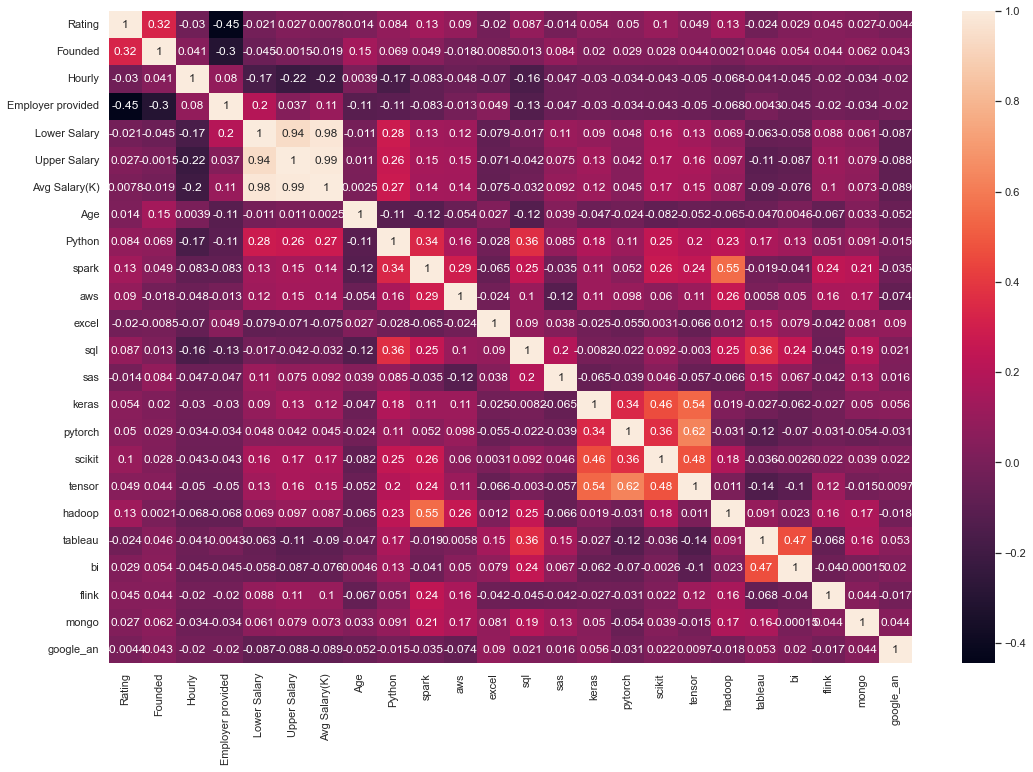

In [441]:
sns.set(rc={'figure.figsize':(18,12)})
sns.heatmap(df.corr(),annot=True)

In [442]:
#formatting our column names
df.columns = df.columns.str.replace(' ','_')


In [443]:
corr_matrix=df.corr().abs()

upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

[column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

['Upper_Salary', 'Avg_Salary(K)']

### We will drop upper salary and lower salary- keeping the avg salary
### We will also drop company age as we already ave a column displaying the year the company was founded
### We will drop sector as it includes the same info as industry etc etc

In [444]:
for i in df.columns:
    print(i)

Job_Title
Salary_Estimate
Job_Description
Rating
Company_Name
Location
Headquarters
Size
Founded
Type_of_ownership
Industry
Sector
Revenue
Competitors
Hourly
Employer_provided
Lower_Salary
Upper_Salary
Avg_Salary(K)
company_txt
Job_Location
Age
Python
spark
aws
excel
sql
sas
keras
pytorch
scikit
tensor
hadoop
tableau
bi
flink
mongo
google_an
job_title_sim
seniority_by_title
Degree


In [445]:
list_to_drop=["lower_salary","upper_salary","age","sector","competitors",
              "hourly","employer_provided","location","company_name","sas",
              "keras","pytorch","scikit","tensor","bi","flink","mongo","google_an","seniority_by_title"]
              

In [446]:
df.columns= df.columns.str.lower()


In [447]:
df = df.drop(list_to_drop,axis=1)

In [448]:
df.dtypes

job_title             object
salary_estimate       object
job_description       object
rating               float64
headquarters          object
size                  object
founded                int64
type_of_ownership     object
industry              object
revenue               object
avg_salary(k)        float64
company_txt           object
job_location          object
python                 int64
spark                  int64
aws                    int64
excel                  int64
sql                    int64
hadoop                 int64
tableau                int64
job_title_sim         object
degree                object
dtype: object

In [449]:
def estimates(column):
    column = re.sub(r'[^0-9]', '', column)
    low=""
    high=""
    for i in range(len(column)):
        if i<=len(column)//2-1:
            low=low+column[i]
        else:
            high=high+column[i]
    templist=[int(low),int(high)]
    mean=sum(templist)/len(templist)
    return mean

df["salary_estimate"]=df["salary_estimate"].apply(estimates)
    

In [450]:
df['revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)'], dtype=object)

In [451]:
df.revenue.value_counts()

Unknown / Non-Applicable            134
$10+ billion (USD)                   70
$100 to $500 million (USD)           57
$1 to $2 billion (USD)               39
$500 million to $1 billion (USD)     34
$50 to $100 million (USD)            30
$2 to $5 billion (USD)               26
$25 to $50 million (USD)             22
$10 to $25 million (USD)             21
$5 to $10 million (USD)              13
$5 to $10 billion (USD)              12
$1 to $5 million (USD)                5
Less than $1 million (USD)            4
Name: revenue, dtype: int64

In [452]:
def rev_clean(rev):
    if rev == "Less than $1 million (USD)":
        return 0.5
    elif rev=="$1 to $5 million (USD)":
        return 3
    elif rev=="$5 to $10 million (USD)":
        return 7.5
    elif rev=="$10 to $25 million (USD)":
        return 17.5
    elif rev=="$25 to $50 million (USD)":
        return 37.5
    elif rev=="$50 to $100 million (USD)":
        return 75
    elif rev=="$100 to $500 million (USD)":
        return 300
    elif rev=="$500 million to $1 billion (USD)":
        return 750
    elif rev=="$1 to $2 billion (USD)":
        return 1500
    elif rev=="$2 to $5 billion (USD)":
        return 3000
    elif rev=="$5 to $10 billion (USD)":
        return 7500
    elif rev=="$10+ billion (USD)":
        return 30000
    else:
        return np.random.choice([30000,300,1500,750,],p=[0.35,0.28,0.2,0.17])
    #the mode may have skewed the results, we went for a random choice between our top 3 most common revenues
    

In [453]:
df['revenue']=df['revenue'].apply(rev_clean)

In [454]:
df = df.reset_index(drop=True)

<AxesSubplot:xlabel='revenue', ylabel='salary_estimate'>

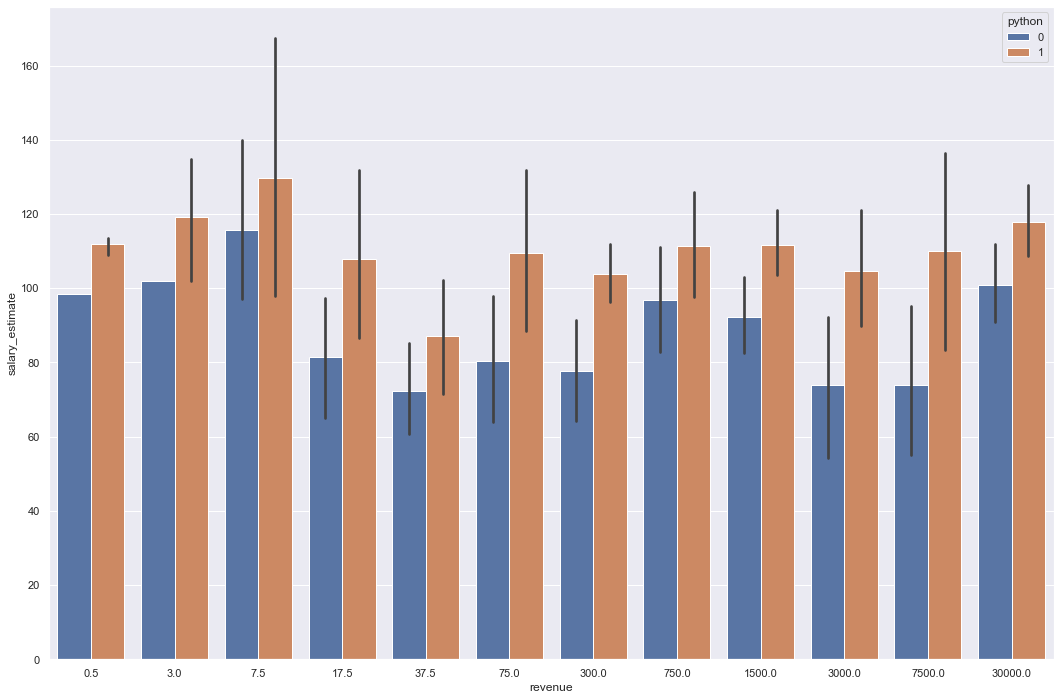

In [455]:
sns.barplot(data=df, x= "revenue", y="salary_estimate", hue="python")



<AxesSubplot:xlabel='type_of_ownership', ylabel='salary_estimate'>

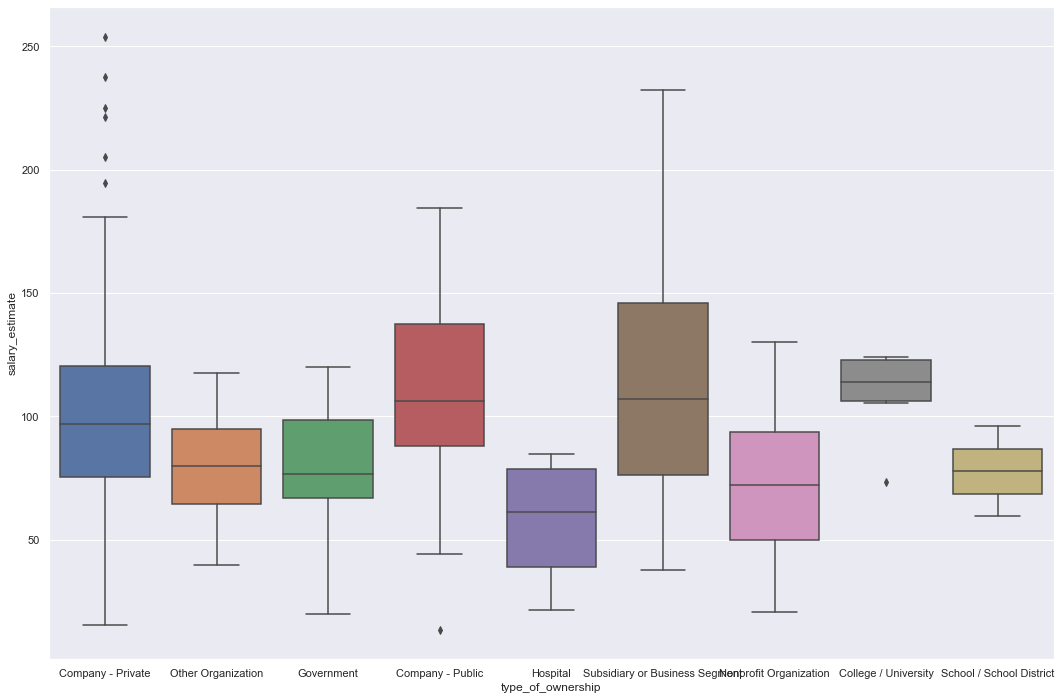

In [456]:
sns.boxplot(data=df, x="type_of_ownership", y="salary_estimate")


<AxesSubplot:xlabel='revenue', ylabel='salary_estimate'>

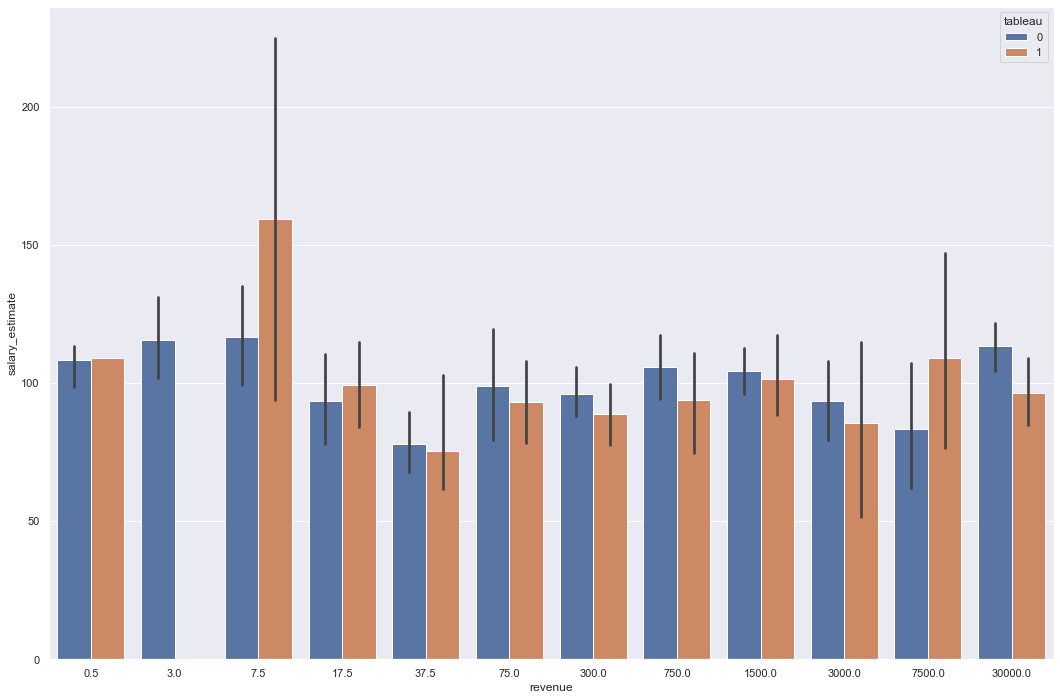

In [457]:
sns.barplot(data=df, x="revenue", y="salary_estimate", hue="tableau")


   ### We have 12 unique values here(excluding the unknown values). We will bin some values together to group these intervals based on their amount. 
   ### Upon further reflection we decided to find the mean of each range in order to translate these values into a single integer amount- similarly to how we approached the "salary"column
   

In [458]:
df.job_title.value_counts()


Data Scientist                                          100
Data Engineer                                            37
Senior Data Scientist                                    21
Data Analyst                                             13
Senior Data Engineer                                      8
                                                       ... 
Senior Research Statistician- Data Scientist              1
Business Data Analyst, SQL                                1
Medical Technologist / Clinical Laboratory Scientist      1
Associate Data Scientist/Computer Scientist               1
Machine Learning Engineer (NLP)                           1
Name: job_title, Length: 264, dtype: int64

In [459]:
def jobclean(job):
    if "scientist" in job.lower() or "science"in job.lower():
        return "Data Scientist"
    elif "analyst" in job.lower() or "analytics" in job.lower():
        return "Data Analyst"
    elif "engineer" in job.lower() or "architect"in job.lower():
        return "Data Engineer"
    elif "manage"in job.lower() or "lead" in job.lower() or "director"in job.lower() or "opportunities"in job.lower():
        return "Data Manager"
    elif "model"in job.lower() :
        return "Data Modeler"
    else:
        return job


In [460]:
df["job_title"] = df["job_title"].apply(jobclean)


In [461]:
df.job_title.unique()

array(['Data Scientist', 'Data Analyst', 'Data Engineer', 'Data Manager',
       'Data Modeler'], dtype=object)

### We found that there was a data simplified column already done so this work above is pretty much obsolete XD. We can drop the entire column for the purpose of our model.Also the company name- company.txt will be of little use for our model.

In [462]:
df = df.drop('job_title',axis=1)


In [463]:
df = df.drop('company_txt',axis=1)

In [464]:
df["size"].value_counts()

1001 - 5000      93
501 - 1000       80
10000+           80
201 - 500        77
51 - 200         61
5001 - 10000     46
1 - 50           24
unknown           6
Name: size, dtype: int64

In [465]:
def mini_size_func(size):
    if size=="unknown":
        return 3000.5 #The most frequent value. Only 6 unknowns
    elif size=="10000+":
        return 10000
    else:
        return estimates(size)


df["size"]=df["size"].apply(mini_size_func)

In [466]:
df.headquarters.value_counts()

New York, NY         34
San Francisco, CA    28
Chicago, IL          18
Cambridge, MA        12
Reston, VA            8
                     ..
Frederick, MD         1
Ewing, NJ             1
Chattanooga, TN       1
Aurora, CO            1
Centennial, CO        1
Name: headquarters, Length: 198, dtype: int64

In [467]:
def clean_headq(city):
    if city=="-1":
        return np.random.choice(["CA","MA","NY","VA"],1,p=[0.45,0.21,0.18,0.16])[0] 
    #Choose randomly between one of the 4 most frequent cities-weighted by the frequency of their values.
    else:
        in_of_comma=city.index(",")
        from_i=in_of_comma+2
        end_i=len(city)
        return city[from_i:end_i]

In [468]:
df["headquarters"]=df["headquarters"].apply(clean_headq)



In [469]:
df.industry.unique()

array(['Aerospace & Defense', 'Health Care Services & Hospitals',
       'Security Services', 'Energy', 'Advertising & Marketing',
       'Real Estate', 'Banks & Credit Unions', 'Consulting', 'Internet',
       'Other Retail Stores', 'Research & Development',
       'Department, Clothing, & Shoe Stores', 'Biotech & Pharmaceuticals',
       'Motion Picture Production & Distribution',
       'Enterprise Software & Network Solutions', 'Insurance Carriers',
       'Insurance Agencies & Brokerages', 'Logistics & Supply Chain',
       'Telecommunications Services', 'IT Services',
       'Computer Hardware & Software', '-1',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Metals Brokers', 'Financial Transaction Processing',
       'Sporting Goods Stores', 'Staffing & Outsourcing', 'Wholesale',
       'Mining', 'Financial Analytics & Research', 'Federal Agencies',
       'Education Training Services',
       'Transportation Equipment Manufacturing', 'Farm Support 

In [470]:
def indclean(indy):
    if "insurance" in indy.lower() or "broker"in indy.lower() or "financ"in indy.lower() or "bank"in indy.lower() or "accounting" in indy.lower() or "stock exchange"in indy.lower() or "lending"in indy.lower():
        return "Finance"
    elif "college"in indy.lower() or "school"in indy.lower() or "education" in indy.lower():
        return "Education"
    elif "retail" in indy.lower() or "consumer"in indy.lower() or "store"in indy.lower() or "wholesale"in indy.lower() or "galler"in indy.lower():
        return "Retail"
    elif "health"in indy.lower():
        return "Healthcare"
    elif "internet"in indy.lower() or "software"in indy.lower() or "telecommunication"in indy.lower() or "it services" in indy.lower():
        return "IT Services"
    elif "motion picture" in indy.lower() or "tv broadcast" in indy.lower() or "gambling" in indy.lower() or "video" in indy.lower():
        return "Entertainment"
    elif "transport"in indy.lower() or "logistics"in indy.lower() or "travel"in indy.lower() or "gas station"in indy.lower() or "truck"in indy.lower():
        return "Transport and Logistics"
    elif "cosmetic" in indy.lower() or "farm"in indy.lower() or "mining"in indy.lower() or "construction"in indy.lower() or "mining" in indy.lower() or "food"in indy.lower():
        return "Other"
    else:
        return indy

In [471]:
df["industry"]=df["industry"].apply(indclean)

In [472]:
df.industry.unique()

array(['Aerospace & Defense', 'Healthcare', 'Security Services', 'Energy',
       'Advertising & Marketing', 'Real Estate', 'Finance', 'Consulting',
       'IT Services', 'Retail', 'Research & Development',
       'Biotech & Pharmaceuticals', 'Entertainment',
       'Transport and Logistics', '-1', 'Industrial Manufacturing',
       'Staffing & Outsourcing', 'Other', 'Federal Agencies', 'Education',
       'Architectural & Engineering Services', 'Religious Organizations',
       'Social Assistance'], dtype=object)

In [473]:
df.industry.value_counts()

IT Services                             127
Finance                                  68
Biotech & Pharmaceuticals                62
Healthcare                               27
Retail                                   23
Consulting                               21
Aerospace & Defense                      20
Advertising & Marketing                  18
Research & Development                   14
Education                                14
Transport and Logistics                  11
Energy                                    8
-1                                        7
Staffing & Outsourcing                    7
Federal Agencies                          7
Entertainment                             6
Real Estate                               5
Other                                     5
Security Services                         4
Religious Organizations                   4
Industrial Manufacturing                  3
Architectural & Engineering Services      3
Social Assistance               

In [474]:
from math import floor
def founded_mean(y):
    mean_y=floor(sum(df.founded)+33)/(len(df.founded)-33) #Taking care of the 33 minus 1s
    if y==-1:
        return mean_y
    else:
        return y

df["founded"]=df["founded"].apply(founded_mean)

In [475]:
def ownership_clean(ownership):
    if "college" in ownership.lower() or "school" in ownership.lower():
        return "Education"
    else:
        return ownership

In [476]:
pd.set_option('display.max_columns', None)

In [477]:
df=df.drop("avg_salary(k)",axis=1)

#### Splitting our database between numerical and catagorical. We can run the initial model with our numericals before adding back our catagorical ones

In [478]:
df["exp"]=df["job_description"].str.findall('\D\d year|\D\d\D year')


def cleanxp(xp):
    if xp==[]:
        return 0
    else:
        for i in range(len(xp)):
            xp[i]=re.sub(r'[^0-9]', '',xp[i])
            maxi=max(xp)
            return int(maxi)

df["exp"]=df["exp"].apply(cleanxp)

In [479]:
num_df=df.select_dtypes(['number'])

num_df

,salary_estimate,rating,size,founded,revenue,python,spark,aws,excel,sql,hadoop,tableau,exp
0,72.0,3.8,750.5,1973.00000,75.0,1,0,0,1,0,0,1,0
1,87.5,3.4,5.0,1984.00000,3000.0,1,0,0,0,0,0,0,3
2,85.0,4.8,750.5,2010.00000,300.0,1,1,0,1,1,0,0,3
3,76.5,3.8,3000.5,1965.00000,750.0,1,0,0,0,0,0,0,1
4,114.5,2.9,125.5,1998.00000,30000.0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,86.5,4.3,3000.5,1999.00000,750.0,0,0,1,1,1,0,0,0
463,89.0,3.4,125.5,1971.85023,7.5,0,0,0,0,0,0,0,0
464,92.0,4.0,750.5,2006.00000,1500.0,0,0,1,1,0,0,0,5
465,111.0,4.1,25.5,2007.00000,30000.0,1,0,1,1,0,0,0,3


array([[<AxesSubplot:title={'center':'salary_estimate'}>,
        <AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'size'}>,
        <AxesSubplot:title={'center':'founded'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'python'}>,
        <AxesSubplot:title={'center':'spark'}>,
        <AxesSubplot:title={'center':'aws'}>],
       [<AxesSubplot:title={'center':'excel'}>,
        <AxesSubplot:title={'center':'sql'}>,
        <AxesSubplot:title={'center':'hadoop'}>,
        <AxesSubplot:title={'center':'tableau'}>],
       [<AxesSubplot:title={'center':'exp'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

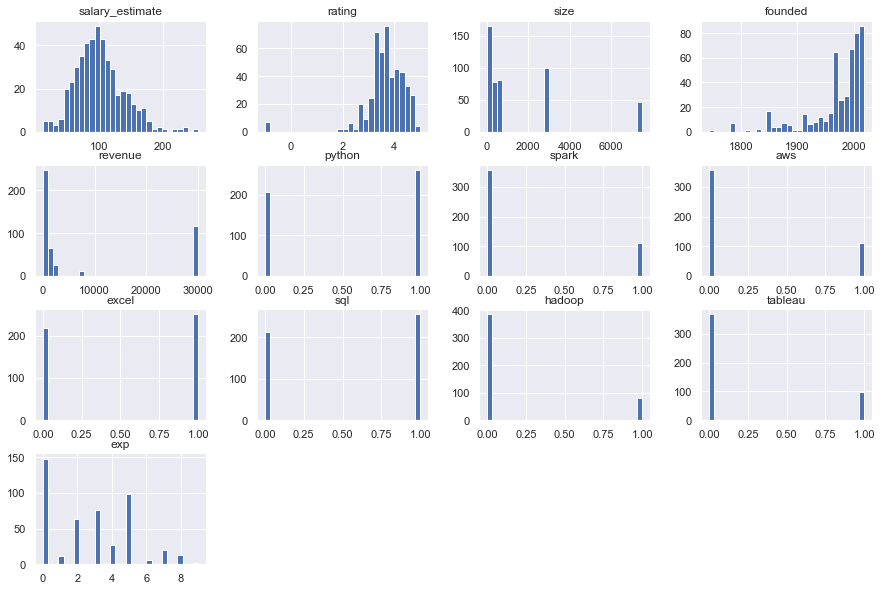

In [480]:
num_df.hist(bins=30, figsize=(15, 10))

### Model 1

In [481]:
#Defining the x and y(target v)
x=num_df.drop('salary_estimate', axis=1)
y=num_df.salary_estimate

In [482]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=.30,random_state=123)

In [483]:
std_scaler=StandardScaler().fit(X_train)   

X_train_scaled=std_scaler.transform(X_train)

In [484]:
X_test_scaled=std_scaler.transform(X_test)

In [485]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:        salary_estimate   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     5.005
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.30e-07
Time:                        09:11:13   Log-Likelihood:                -1610.2
No. Observations:                 326   AIC:                             3246.
Df Residuals:                     313   BIC:                             3296.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.6074      1.911     52.660      0.0

In [486]:
df = df.drop('job_description',axis=1)
df

,salary_estimate,rating,headquarters,size,founded,type_of_ownership,industry,revenue,job_location,python,spark,aws,excel,sql,hadoop,tableau,job_title_sim,degree,exp
0,72.0,3.8,CA,750.5,1973.00000,Company - Private,Aerospace & Defense,75.0,NM,1,0,0,1,0,0,1,data scientist,M,0
1,87.5,3.4,MD,5.0,1984.00000,Other Organization,Healthcare,3000.0,MD,1,0,0,0,0,0,0,data scientist,M,3
2,85.0,4.8,FL,750.5,2010.00000,Company - Private,Security Services,300.0,FL,1,1,0,1,1,0,0,data scientist,M,3
3,76.5,3.8,WA,3000.5,1965.00000,Government,Energy,750.0,WA,1,0,0,0,0,0,0,data scientist,na,1
4,114.5,2.9,NY,125.5,1998.00000,Company - Private,Advertising & Marketing,30000.0,NY,1,0,0,1,1,0,0,data scientist,na,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,86.5,4.3,NY,3000.5,1999.00000,Company - Public,IT Services,750.0,NY,0,0,1,1,1,0,0,data modeler,M,0
463,89.0,3.4,CO,125.5,1971.85023,Company - Private,IT Services,7.5,WA,0,0,0,0,0,0,0,data scientist,na,0
464,92.0,4.0,CA,750.5,2006.00000,Company - Private,Biotech & Pharmaceuticals,1500.0,CA,0,0,1,1,0,0,0,other scientist,M,5
465,111.0,4.1,CA,25.5,2007.00000,Company - Private,Education,30000.0,CA,1,0,1,1,0,0,0,machine learning engineer,na,3


In [487]:
category_list=list(df.select_dtypes(['object']).columns)

cat_df = df[category_list]

cat_df

,headquarters,type_of_ownership,industry,job_location,job_title_sim,degree
0,CA,Company - Private,Aerospace & Defense,NM,data scientist,M
1,MD,Other Organization,Healthcare,MD,data scientist,M
2,FL,Company - Private,Security Services,FL,data scientist,M
3,WA,Government,Energy,WA,data scientist,na
4,NY,Company - Private,Advertising & Marketing,NY,data scientist,na
...,...,...,...,...,...,...
462,NY,Company - Public,IT Services,NY,data modeler,M
463,CO,Company - Private,IT Services,WA,data scientist,na
464,CA,Company - Private,Biotech & Pharmaceuticals,CA,other scientist,M
465,CA,Company - Private,Education,CA,machine learning engineer,na


In [488]:
dum_df= pd.get_dummies(cat_df,drop_first=True)
dum_df


,headquarters_AR,headquarters_AZ,headquarters_Belgium,headquarters_Bermuda,headquarters_CA,headquarters_CO,headquarters_CT,headquarters_China,headquarters_DC,headquarters_DE,headquarters_FL,headquarters_France,headquarters_GA,headquarters_Germany,headquarters_IA,headquarters_ID,headquarters_IL,headquarters_IN,headquarters_India,headquarters_Japan,headquarters_LA,headquarters_MA,headquarters_MD,headquarters_MI,headquarters_MN,headquarters_MO,headquarters_NC,headquarters_NE,headquarters_NJ,headquarters_NY,headquarters_OH,headquarters_OR,headquarters_PA,headquarters_RI,headquarters_SC,headquarters_South Korea,headquarters_Spain,headquarters_Switzerland,headquarters_TN,headquarters_TX,headquarters_UT,headquarters_United Kingdom,headquarters_VA,headquarters_WA,headquarters_WI,type_of_ownership_Company - Private,type_of_ownership_Company - Public,type_of_ownership_Government,type_of_ownership_Hospital,type_of_ownership_Nonprofit Organization,type_of_ownership_Other Organization,type_of_ownership_School / School District,type_of_ownership_Subsidiary or Business Segment,industry_Advertising & Marketing,industry_Aerospace & Defense,industry_Architectural & Engineering Services,industry_Biotech & Pharmaceuticals,industry_Consulting,industry_Education,industry_Energy,industry_Entertainment,industry_Federal Agencies,industry_Finance,industry_Healthcare,industry_IT Services,industry_Industrial Manufacturing,industry_Other,industry_Real Estate,industry_Religious Organizations,industry_Research & Development,industry_Retail,industry_Security Services,industry_Social Assistance,industry_Staffing & Outsourcing,industry_Transport and Logistics,job_location_AZ,job_location_CA,job_location_CO,job_location_CT,job_location_DC,job_location_DE,job_location_FL,job_location_GA,job_location_IA,job_location_ID,job_location_IL,job_location_IN,job_location_KS,job_location_KY,job_location_LA,job_location_MA,job_location_MD,job_location_MI,job_location_MN,job_location_MO,job_location_NC,job_location_NE,job_location_NJ,job_location_NM,job_location_NY,job_location_OH,job_location_OR,job_location_PA,job_location_RI,job_location_SC,job_location_TN,job_location_TX,job_location_UT,job_location_VA,job_location_WA,job_location_WI,job_title_sim_analyst,job_title_sim_data analitics,job_title_sim_data engineer,job_title_sim_data modeler,job_title_sim_data scientist,job_title_sim_director,job_title_sim_machine learning engineer,job_title_sim_na,job_title_sim_other scientist,degree_P,degree_na
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

### Model 2 Catagorical Variables

In [489]:
#y has already been defined in our previous model

In [490]:
X_train2, X_test2, y_train2, y_test2= train_test_split(dum_df, y, test_size=.30,random_state=123)

In [491]:
X_train_const2 = sm.add_constant(X_train2) # adding a constant

model2 = sm.OLS(y_train2, X_train_const2).fit()
predictions_train2 = model2.predict(X_train_const2) 

X_test_const2 = sm.add_constant(X_test2) # adding a constant
predictions_test2 = model2.predict(X_test_const2) 
print_model2 = model2.summary()
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:        salary_estimate   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     2.548
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           2.03e-09
Time:                        09:11:13   Log-Likelihood:                -1493.9
No. Observations:                 326   AIC:                             3224.
Df Residuals:                     208   BIC:                             3671.
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [492]:
model2=LinearRegression()    # model
model2.fit(X_train2, y_train2)  

LinearRegression()

In [493]:
y_pred2=model2.predict(X_test2)   # model prediction

y_pred_train2=model2.predict(X_train2)

In [494]:
result2=pd.DataFrame({"y_test2":y_test2,"y_pred2":y_pred2})
result2

,y_test2,y_pred2
48,91.0,70.676698
318,110.5,113.863221
85,174.0,120.180468
34,107.0,140.385790
11,85.0,107.782167
...,...,...
170,124.5,74.868212
378,80.0,115.393114
181,181.0,126.002978
172,59.0,9.756776


In [495]:
print(mse(y_test2,y_pred2))
print(mae(y_test2,y_pred2))

4.7864471539008173e+27
6120655684899.274


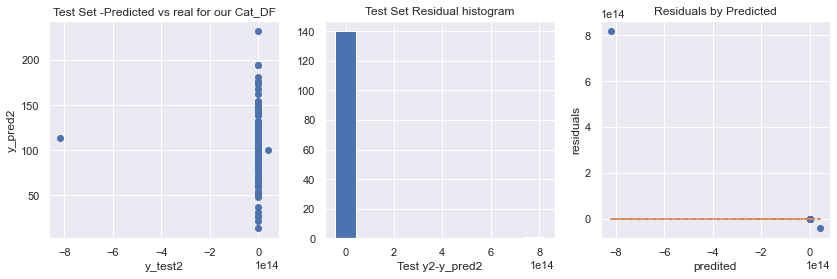

In [496]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred2, y_test2, 'o')
ax[0].set_xlabel("y_test2")
ax[0].set_ylabel("y_pred2")
ax[0].set_title("Test Set -Predicted vs real for our Cat_DF")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test2 - y_pred2)
ax[1].set_xlabel("Test y2-y_pred2")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred2,y_test2 - y_pred2,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred2,np.zeros(len(y_pred2)),linestyle='dashed')

### Transforming our numerical variables before concatinating to try improve our combined model

/Users/ciaranmacdermott/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Transformed Ratings Feature')]

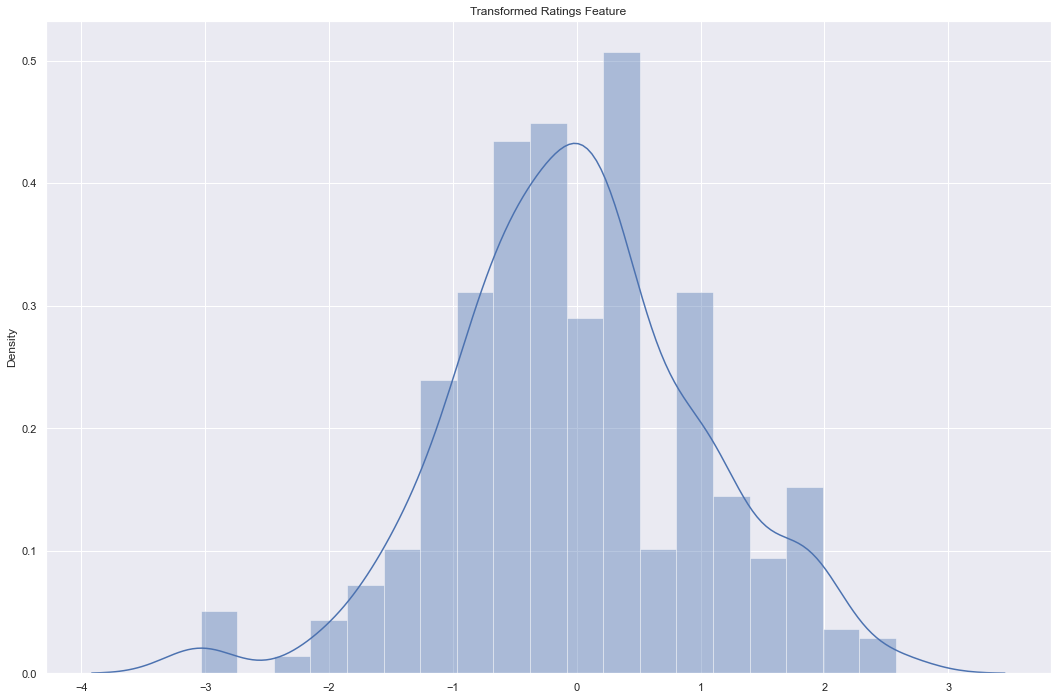

In [497]:
pt = PowerTransformer()
rating_trans=pt.fit_transform(num_df["rating"].to_numpy().reshape(-1,1))
sns.distplot(rating_trans).set(title='Transformed Ratings Feature')


In [498]:
num_df["rating"]= rating_trans

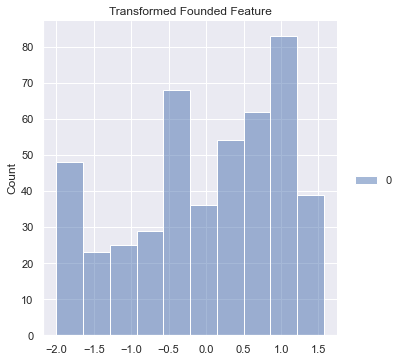

In [499]:
pt2 = PowerTransformer()
founded_trans=pt.fit_transform(num_df["founded"].to_numpy().reshape(-1,1))
sns.displot(founded_trans).set(title='Transformed Founded Feature')


In [500]:
num_df["founded"]= founded_trans
num_df

,salary_estimate,rating,size,founded,revenue,python,spark,aws,excel,sql,hadoop,tableau,exp
0,72.0,0.083876,750.5,-0.403755,75.0,1,0,0,1,0,0,1,0
1,87.5,-0.553556,5.0,-0.060047,3000.0,1,0,0,0,0,0,0,3
2,85.0,2.098810,750.5,1.057475,300.0,1,1,0,1,1,0,0,3
3,76.5,0.083876,3000.5,-0.616275,750.0,1,0,0,0,0,0,0,1
4,114.5,-1.226256,125.5,0.480895,30000.0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,86.5,1.013191,3000.5,0.524636,750.0,0,0,1,1,1,0,0,0
463,89.0,-0.553556,125.5,-0.436110,7.5,0,0,0,0,0,0,0,0
464,92.0,0.437460,750.5,0.852269,1500.0,0,0,1,1,0,0,0,5
465,111.0,0.623245,25.5,0.902291,30000.0,1,0,1,1,0,0,0,3


In [501]:
scaler = MinMaxScaler()
x1=num_df["revenue"].values.reshape(-1,1)

x1_scaled = scaler.fit_transform(x1)
num_df["revenue"]=x1_scaled
x1_scaled


array([[2.48337472e-03],
       [9.99849997e-02],
       [9.98349972e-03],
       [2.49837497e-02],
       [1.00000000e+00],
       [4.99841664e-02],
       [4.99841664e-02],
       [1.23335389e-03],
       [2.49837497e-02],
       [9.98349972e-03],
       [4.99841664e-02],
       [4.99841664e-02],
       [1.00000000e+00],
       [9.98349972e-03],
       [1.00000000e+00],
       [2.49837497e-02],
       [8.33347222e-05],
       [9.98349972e-03],
       [1.00000000e+00],
       [2.49837497e-02],
       [9.98349972e-03],
       [2.49837497e-02],
       [1.00000000e+00],
       [5.66676111e-04],
       [9.98349972e-03],
       [1.00000000e+00],
       [9.98349972e-03],
       [2.49987500e-01],
       [1.00000000e+00],
       [2.49837497e-02],
       [1.00000000e+00],
       [9.99849997e-02],
       [4.99841664e-02],
       [4.99841664e-02],
       [4.99841664e-02],
       [9.98349972e-03],
       [4.99841664e-02],
       [9.98349972e-03],
       [2.48337472e-03],
       [0.00000000e+00],


/Users/ciaranmacdermott/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'MinMax Revenue Feature')]

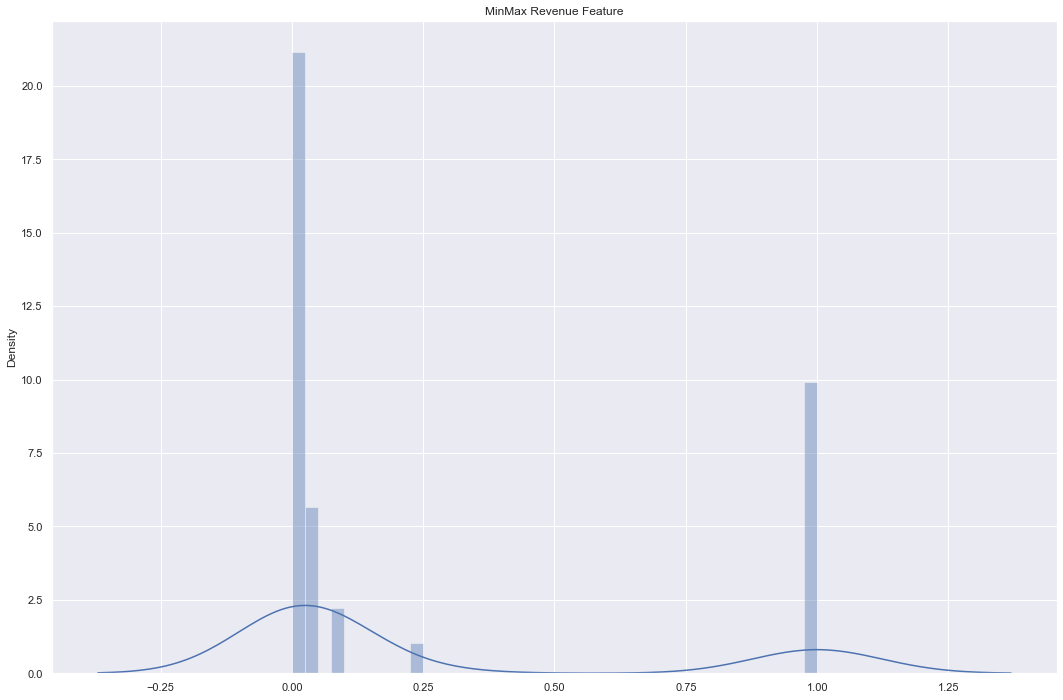

In [502]:
sns.distplot(x1_scaled,bins=40).set(title= 'MinMax Revenue Feature')


In [503]:
x2=num_df["size"].values.reshape(-1,1)
x2_scaled = scaler.fit_transform(x2)
num_df["size"]=x2_scaled

In [504]:
num_df

,salary_estimate,rating,size,founded,revenue,python,spark,aws,excel,sql,hadoop,tableau,exp
0,72.0,0.083876,0.099460,-0.403755,0.002483,1,0,0,1,0,0,1,0
1,87.5,-0.553556,0.000000,-0.060047,0.099985,1,0,0,0,0,0,0,3
2,85.0,2.098810,0.099460,1.057475,0.009983,1,1,0,1,1,0,0,3
3,76.5,0.083876,0.399640,-0.616275,0.024984,1,0,0,0,0,0,0,1
4,114.5,-1.226256,0.016076,0.480895,1.000000,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,86.5,1.013191,0.399640,0.524636,0.024984,0,0,1,1,1,0,0,0
463,89.0,-0.553556,0.016076,-0.436110,0.000233,0,0,0,0,0,0,0,0
464,92.0,0.437460,0.099460,0.852269,0.049984,0,0,1,1,0,0,0,5
465,111.0,0.623245,0.002735,0.902291,1.000000,1,0,1,1,0,0,0,3


[Text(0.5, 1.0, 'MinMax Size')]

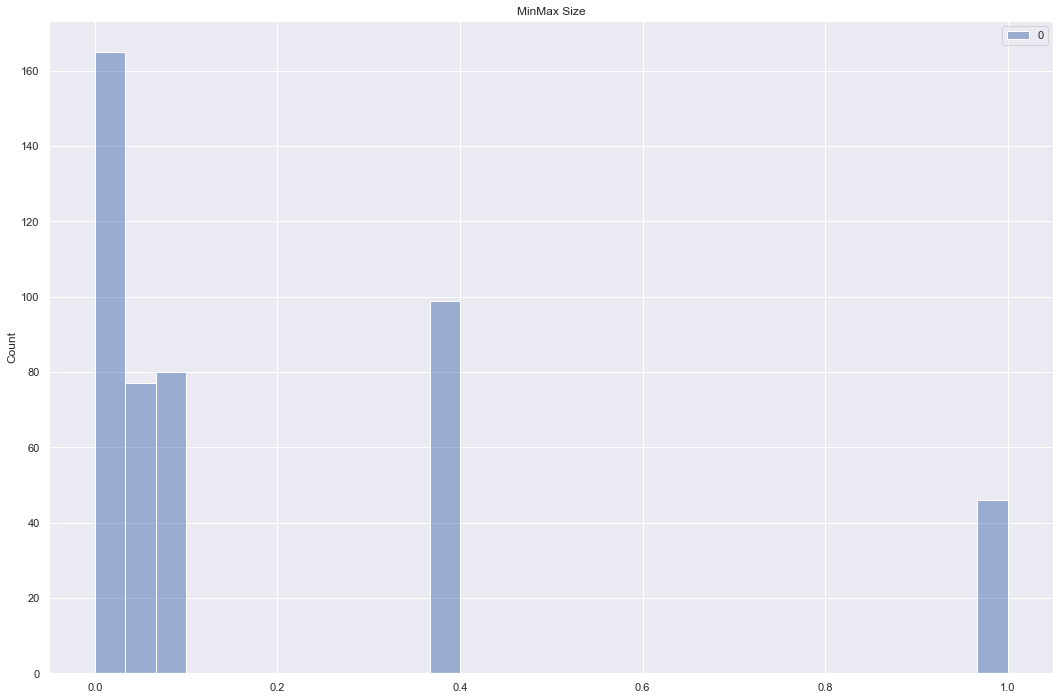

In [505]:
sns.histplot(x2_scaled,bins=30).set(title='MinMax Size')

### We can concat both the nums and cats now- though on first instance our data will likely need to be more generally grouped . 

In [506]:
main_df=pd.concat([num_df,dum_df],axis=1)


In [507]:
main_df

,salary_estimate,rating,size,founded,revenue,python,spark,aws,excel,sql,hadoop,tableau,exp,headquarters_AR,headquarters_AZ,headquarters_Belgium,headquarters_Bermuda,headquarters_CA,headquarters_CO,headquarters_CT,headquarters_China,headquarters_DC,headquarters_DE,headquarters_FL,headquarters_France,headquarters_GA,headquarters_Germany,headquarters_IA,headquarters_ID,headquarters_IL,headquarters_IN,headquarters_India,headquarters_Japan,headquarters_LA,headquarters_MA,headquarters_MD,headquarters_MI,headquarters_MN,headquarters_MO,headquarters_NC,headquarters_NE,headquarters_NJ,headquarters_NY,headquarters_OH,headquarters_OR,headquarters_PA,headquarters_RI,headquarters_SC,headquarters_South Korea,headquarters_Spain,headquarters_Switzerland,headquarters_TN,headquarters_TX,headquarters_UT,headquarters_United Kingdom,headquarters_VA,headquarters_WA,headquarters_WI,type_of_ownership_Company - Private,type_of_ownership_Company - Public,type_of_ownership_Government,type_of_ownership_Hospital,type_of_ownership_Nonprofit Organization,type_of_ownership_Other Organization,type_of_ownership_School / School District,type_of_ownership_Subsidiary or Business Segment,industry_Advertising & Marketing,industry_Aerospace & Defense,industry_Architectural & Engineering Services,industry_Biotech & Pharmaceuticals,industry_Consulting,industry_Education,industry_Energy,industry_Entertainment,industry_Federal Agencies,industry_Finance,industry_Healthcare,industry_IT Services,industry_Industrial Manufacturing,industry_Other,industry_Real Estate,industry_Religious Organizations,industry_Research & Development,industry_Retail,industry_Security Services,industry_Social Assistance,industry_Staffing & Outsourcing,industry_Transport and Logistics,job_location_AZ,job_location_CA,job_location_CO,job_location_CT,job_location_DC,job_location_DE,job_location_FL,job_location_GA,job_location_IA,job_location_ID,job_location_IL,job_location_IN,job_location_KS,job_location_KY,job_location_LA,job_location_MA,job_location_MD,job_location_MI,job_location_MN,job_location_MO,job_location_NC,job_location_NE,job_location_NJ,job_location_NM,job_location_NY,job_location_OH,job_location_OR,job_location_PA,job_location_RI,job_location_SC,job_location_TN,job_location_TX,job_location_UT,job_location_VA,job_location_WA,job_location_WI,job_title_sim_analyst,job_title_sim_data analitics,job_title_sim_data engineer,job_title_sim_data modeler,job_title_sim_data scientist,job_title_sim_director,job_title_sim_machine learning engineer,job_title_sim_na,job_title_sim_other scientist,degree_P,degree_na
0,72.0,0.083876,0.099460,-0.403755,0.002483,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,87.5,-0.553556,0.000000,-0.060047,0.099985,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,85.0,2.098810,0.099460,1.057475,0.009983,1,1,0,1,1,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,76.5,0.083876,0.399640,-0.616275,0.024984,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,114.5,-1.226256,0.016076,0.480895,1.000000,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [508]:
#Defining the x and y(target v)
x3=main_df.drop('salary_estimate', axis=1)
y3=main_df.salary_estimate

In [509]:
X_train3, X_test3, y_train3, y_test3= train_test_split(x3, y3, test_size=.30,random_state=123)

In [510]:
X_train_const3 = sm.add_constant(X_train3) # adding a constant

model3 = sm.OLS(y_train3, X_train_const3).fit()
predictions_train3 = model3.predict(X_train_const3) 

X_test_const3 = sm.add_constant(X_test3) # adding a constant
predictions_test3 = model3.predict(X_test_const3) 
print_model3 = model3.summary()
print(print_model3)


                            OLS Regression Results                            
Dep. Variable:        salary_estimate   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     2.710
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.42e-10
Time:                        09:11:17   Log-Likelihood:                -1472.0
No. Observations:                 326   AIC:                             3204.
Df Residuals:                     196   BIC:                             3696.
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [511]:
def statebin(binny):
    if "CT" in binny or "ME"in binny or "MA"in binny or "NH"in binny or "RI" in binny or "VY"in binny:
        return "Boston Region"
    elif "NY"in binny or "NJ"in binny or "PR"in binny or "VI"in binny:
        return "New York Region"
    elif "DE"in binny or "DC"in binny or "MD"in binny or "VA"in binny or "PA" in binny:
        return "Philadelphia Region"
    elif "AL"in binny or "FL"in binny or "GA" in binny or "KY"in binny or "MS"in binny or "NC"in binny or "SC"in binny or "TN"in binny:
        return "Atlanta Region"
    elif "IL"in binny or "IN"in binny or "MI"in binny or "MN"in binny or "OH"in binny or "WI"in binny:
        return "Chicago Region"
    elif "AR"in binny or "LA" in binny or "NM"in binny or "OK"in binny or "TX"in binny:
        return "Dallas Region"
    elif "IA"in binny or "KS"in binny or "MO"in binny or "NE"in binny:
        return "Kansas City Region"
    elif "CO"in binny or "MT"in binny or "ND" in binny or "SD"in binny or "UT" in binny or "WY"in binny:
        return "Denver Region"
    elif "AZ"in binny or "CA"in binny or "HI"in binny or "NV" in binny:
        return "San Francisco Region"
    elif "AK"in binny or "ID"in binny or "OR" in binny or "WA"in binny:
        return "Seattle Region"
    elif "United Kingdom"in binny:
        return "United Kingdom"
    elif "Switzerland"in binny:
        return "Switzerland"
    elif "Japan"in binny:
        return "Japan"
    else:
        return "Other"

In [512]:
cat_df["headquarters"]=cat_df["headquarters"].apply(statebin)

/var/folders/p_/wx7lhsds7k55bv_lwkld0fkr0000gn/T/ipykernel_29277/1968454685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df["headquarters"]=cat_df["headquarters"].apply(statebin)


In [513]:
cat_df

,headquarters,type_of_ownership,industry,job_location,job_title_sim,degree
0,San Francisco Region,Company - Private,Aerospace & Defense,NM,data scientist,M
1,Philadelphia Region,Other Organization,Healthcare,MD,data scientist,M
2,Atlanta Region,Company - Private,Security Services,FL,data scientist,M
3,Seattle Region,Government,Energy,WA,data scientist,na
4,New York Region,Company - Private,Advertising & Marketing,NY,data scientist,na
...,...,...,...,...,...,...
462,New York Region,Company - Public,IT Services,NY,data modeler,M
463,Denver Region,Company - Private,IT Services,WA,data scientist,na
464,San Francisco Region,Company - Private,Biotech & Pharmaceuticals,CA,other scientist,M
465,San Francisco Region,Company - Private,Education,CA,machine learning engineer,na


In [514]:
cat_df.headquarters.value_counts()

San Francisco Region    110
Philadelphia Region      79
Boston Region            55
New York Region          51
Chicago Region           42
Atlanta Region           35
Denver Region            17
Seattle Region           16
Other                    14
Dallas Region            13
Kansas City Region       11
United Kingdom           10
Japan                     7
Switzerland               7
Name: headquarters, dtype: int64

In [515]:
cat_df["job_location"]=cat_df["job_location"].apply(statebin)
cat_df

/var/folders/p_/wx7lhsds7k55bv_lwkld0fkr0000gn/T/ipykernel_29277/2177887147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df["job_location"]=cat_df["job_location"].apply(statebin)


,headquarters,type_of_ownership,industry,job_location,job_title_sim,degree
0,San Francisco Region,Company - Private,Aerospace & Defense,Dallas Region,data scientist,M
1,Philadelphia Region,Other Organization,Healthcare,Philadelphia Region,data scientist,M
2,Atlanta Region,Company - Private,Security Services,Atlanta Region,data scientist,M
3,Seattle Region,Government,Energy,Seattle Region,data scientist,na
4,New York Region,Company - Private,Advertising & Marketing,New York Region,data scientist,na
...,...,...,...,...,...,...
462,New York Region,Company - Public,IT Services,New York Region,data modeler,M
463,Denver Region,Company - Private,IT Services,Seattle Region,data scientist,na
464,San Francisco Region,Company - Private,Biotech & Pharmaceuticals,San Francisco Region,other scientist,M
465,San Francisco Region,Company - Private,Education,San Francisco Region,machine learning engineer,na


In [516]:
dum_df2= pd.get_dummies(cat_df,drop_first=True)
dum_df2.columns= dum_df2.columns.str.lower()

dum_df2


,headquarters_boston region,headquarters_chicago region,headquarters_dallas region,headquarters_denver region,headquarters_japan,headquarters_kansas city region,headquarters_new york region,headquarters_other,headquarters_philadelphia region,headquarters_san francisco region,headquarters_seattle region,headquarters_switzerland,headquarters_united kingdom,type_of_ownership_company - private,type_of_ownership_company - public,type_of_ownership_government,type_of_ownership_hospital,type_of_ownership_nonprofit organization,type_of_ownership_other organization,type_of_ownership_school / school district,type_of_ownership_subsidiary or business segment,industry_advertising & marketing,industry_aerospace & defense,industry_architectural & engineering services,industry_biotech & pharmaceuticals,industry_consulting,industry_education,industry_energy,industry_entertainment,industry_federal agencies,industry_finance,industry_healthcare,industry_it services,industry_industrial manufacturing,industry_other,industry_real estate,industry_religious organizations,industry_research & development,industry_retail,industry_security services,industry_social assistance,industry_staffing & outsourcing,industry_transport and logistics,job_location_boston region,job_location_chicago region,job_location_dallas region,job_location_denver region,job_location_kansas city region,job_location_new york region,job_location_philadelphia region,job_location_san francisco region,job_location_seattle region,job_title_sim_analyst,job_title_sim_data analitics,job_title_sim_data engineer,job_title_sim_data modeler,job_title_sim_data scientist,job_title_sim_director,job_title_sim_machine learning engineer,job_title_sim_na,job_title_sim_other scientist,degree_p,degree_na
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
463,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
464,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
465,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [517]:
main_df2=pd.concat([num_df,dum_df2],axis=1)
main_df2

,salary_estimate,rating,size,founded,revenue,python,spark,aws,excel,sql,hadoop,tableau,exp,headquarters_boston region,headquarters_chicago region,headquarters_dallas region,headquarters_denver region,headquarters_japan,headquarters_kansas city region,headquarters_new york region,headquarters_other,headquarters_philadelphia region,headquarters_san francisco region,headquarters_seattle region,headquarters_switzerland,headquarters_united kingdom,type_of_ownership_company - private,type_of_ownership_company - public,type_of_ownership_government,type_of_ownership_hospital,type_of_ownership_nonprofit organization,type_of_ownership_other organization,type_of_ownership_school / school district,type_of_ownership_subsidiary or business segment,industry_advertising & marketing,industry_aerospace & defense,industry_architectural & engineering services,industry_biotech & pharmaceuticals,industry_consulting,industry_education,industry_energy,industry_entertainment,industry_federal agencies,industry_finance,industry_healthcare,industry_it services,industry_industrial manufacturing,industry_other,industry_real estate,industry_religious organizations,industry_research & development,industry_retail,industry_security services,industry_social assistance,industry_staffing & outsourcing,industry_transport and logistics,job_location_boston region,job_location_chicago region,job_location_dallas region,job_location_denver region,job_location_kansas city region,job_location_new york region,job_location_philadelphia region,job_location_san francisco region,job_location_seattle region,job_title_sim_analyst,job_title_sim_data analitics,job_title_sim_data engineer,job_title_sim_data modeler,job_title_sim_data scientist,job_title_sim_director,job_title_sim_machine learning engineer,job_title_sim_na,job_title_sim_other scientist,degree_p,degree_na
0,72.0,0.083876,0.099460,-0.403755,0.002483,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,87.5,-0.553556,0.000000,-0.060047,0.099985,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,85.0,2.098810,0.099460,1.057475,0.009983,1,1,0,1,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,76.5,0.083876,0.399640,-0.616275,0.024984,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,114.5,-1.226256,0.016076,0.480895,1.000000,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,86.5,1.013191,0.399640,0.524636,0.024984,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
463,89.0,-0.553556,0.016076,-0.436110,0.000233,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
464,92.0,0.437460,0.099460,0.852269,0.049984,0,0,1,1,0,0,0,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
465,111.0,0.623245,0.002735,0.902291,1.000000,1,0,1,1,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


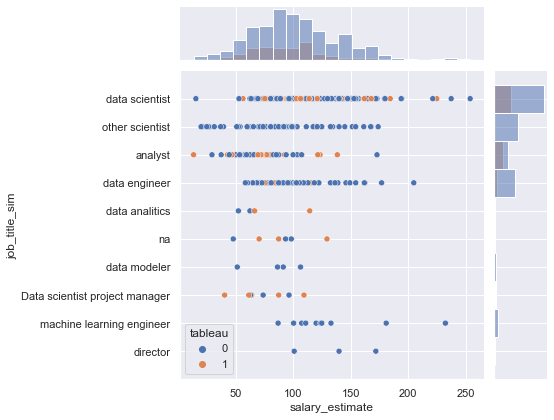

In [518]:

g = sns.JointGrid(data=df, x="salary_estimate", y="job_title_sim", hue="tableau")
g.plot(sns.scatterplot, sns.histplot)

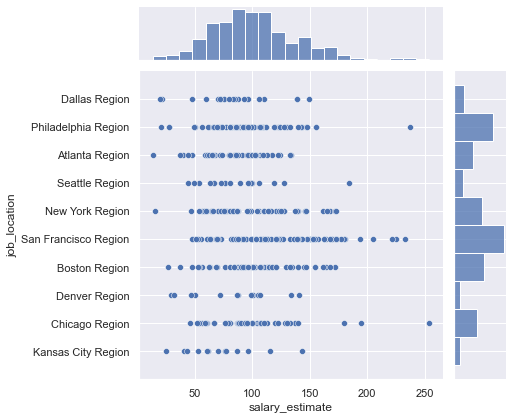

In [521]:
#f,ax = plt.subplots(figsize=(16,12))
#sns.jointplot(x=num_df.salary_estimate,y=cat_df.job_location)

#fig1 = plt.figure() # this creates a figure 8 inch wide, 4 inch high
sns.jointplot(x=num_df.salary_estimate,y=cat_df.job_location)
#ax.set_xticks([0,25,75,100,125,150,175,200,225,250,275])
#plt.xticks(rotation=90)
#plt.show()


### Model 4 with our Grouped Data by Geographic Region

In [522]:
#Defining the x and y(target v)

x4=main_df2.drop("salary_estimate", axis=1)
y4=main_df2.salary_estimate

In [523]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=.30,random_state=42)
#df = df.drop('job_title',axis=1)

In [524]:
X_train_const4 = sm.add_constant(X_train4) # adding a constant

model4 = sm.OLS(y_train4, X_train_const4).fit()
predictions_train4 = model4.predict(X_train_const4) 

X_test_const4 = sm.add_constant(X_test4) # adding a constant

predictions_test4 = model4.predict(X_test_const4) 

print_model4 = model4.summary()
print(print_model4)




                            OLS Regression Results                            
Dep. Variable:        salary_estimate   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     3.539
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           4.98e-14
Time:                        09:13:23   Log-Likelihood:                -1513.7
No. Observations:                 326   AIC:                             3179.
Df Residuals:                     250   BIC:                             3467.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [525]:
pvals=pd.DataFrame(model4.pvalues)
pvals = pvals.reset_index(level=0)
pvals=pvals.rename(columns={"index":"feat",0:"value"})
pvals



,feat,value
0,const,0.008171
1,rating,0.205392
2,size,0.341252
3,founded,0.781677
4,revenue,0.195830
...,...,...
71,job_title_sim_machine learning engineer,0.012831
72,job_title_sim_na,0.729982
73,job_title_sim_other scientist,0.080458
74,degree_p,0.075136


In [526]:
pvals.loc[pvals['value'] < 0.05]

,feat,value
0,const,0.008171
36,industry_architectural & engineering services,0.046462
47,industry_other,0.040138
63,job_location_san francisco region,0.012202
67,job_title_sim_data engineer,0.007202
69,job_title_sim_data scientist,0.000609
70,job_title_sim_director,0.043595
71,job_title_sim_machine learning engineer,0.012831


### Trying to improve model with RFE

In [527]:
x5=main_df2.drop("salary_estimate", axis=1)
y5=main_df2.salary_estimate

 ## recursive feature elemination technique


In [528]:
x5=main_df2.drop("salary_estimate", axis=1)
y5=main_df2.salary_estimate

In [529]:
from sklearn.feature_selection import RFE 

In [530]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(x5, y5, test_size=.30,random_state=42)


In [531]:
X_train5 = pd.DataFrame(X_train5, columns=x5.columns)
X_test5  = pd.DataFrame(X_test5, columns=x5.columns)


In [532]:
lm = LinearRegression()
#before f to select was 22


selector = RFE(lm, n_features_to_select= 7, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train5, y_train5)

Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 fe

RFE(estimator=LinearRegression(), n_features_to_select=7, verbose=1)

In [533]:
kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train5.iloc[:,kept_features].columns)

In [534]:
X_train5 = selector.transform(X_train5)
X_test5  = selector.transform(X_test5)

X_train5 = pd.DataFrame(X_train5, columns=kept_features)
X_test5  = pd.DataFrame(X_test5, columns=kept_features)

print("Final selected features: ")
display(X_train5)

Final selected features: 


,headquarters_japan,type_of_ownership_government,industry_architectural & engineering services,industry_other,industry_social assistance,job_title_sim_director,job_title_sim_machine learning engineer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
321,0.0,0.0,0.0,0.0,0.0,0.0,0.0
322,0.0,0.0,0.0,0.0,0.0,0.0,1.0
323,0.0,0.0,0.0,0.0,0.0,0.0,0.0
324,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [535]:
#X_train_const5 = sm.add_constant(X_train5) # adding a constant

#model5 = sm.OLS(y_train5, X_train_const5).fit()

#X_test_const5 = sm.add_constant(X_test5) # adding a constant

#predictions_test5 = model5.predict(X_test_const5) 

#print_model5 = model5.summary()
#print(print_model5)

In [536]:
X_train5.shape

(326, 7)

In [537]:
X_test5.shape

(141, 7)

In [538]:

x6=main_df2[["headquarters_denver region","headquarters_japan","type_of_ownership_government","type_of_ownership_hospital","industry_architectural & engineering services","industry_federal agencies","industry_industrial manufacturing","industry_other","industry_security services","industry_social assistance","job_location_denver region","job_title_sim_data engineer","job_title_sim_data scientist","job_title_sim_director","job_title_sim_machine learning engineer","job_title_sim_other scientist"]]
             
y6=main_df2.salary_estimate




In [539]:
x6.columns

Index(['headquarters_denver region', 'headquarters_japan',
       'type_of_ownership_government', 'type_of_ownership_hospital',
       'industry_architectural & engineering services',
       'industry_federal agencies', 'industry_industrial manufacturing',
       'industry_other', 'industry_security services',
       'industry_social assistance', 'job_location_denver region',
       'job_title_sim_data engineer', 'job_title_sim_data scientist',
       'job_title_sim_director', 'job_title_sim_machine learning engineer',
       'job_title_sim_other scientist'],
      dtype='object')

In [540]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(x6, y6, test_size=.30,random_state=123)

In [541]:
X_train_const6 = sm.add_constant(X_train6) # adding a constant

model6 = sm.OLS(y_train6, X_train_const6).fit()

X_test_const6 = sm.add_constant(X_test6) # adding a constant

print_model6 = model6.summary()
print(print_model6)

                            OLS Regression Results                            
Dep. Variable:        salary_estimate   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     10.11
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.73e-20
Time:                        09:13:23   Log-Likelihood:                -1570.2
No. Observations:                 326   AIC:                             3174.
Df Residuals:                     309   BIC:                             3239.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

#### Using SciKit Model

In [542]:
model6=LinearRegression()    # model
model6.fit(X_train_const6, y_train6)  

LinearRegression()

In [543]:
y_pred=model6.predict(X_test_const6)   # model prediction

y_pred_train=model6.predict(X_train_const6)

In [544]:
result=pd.DataFrame({"y_test":y_test6,"y_pred":y_pred})
result

,y_test,y_pred
48,91.0,120.050606
318,110.5,120.050606
85,174.0,91.993185
34,107.0,120.050606
11,85.0,120.050606
...,...,...
170,124.5,120.050606
378,80.0,101.535742
181,181.0,117.308378
172,59.0,70.451283


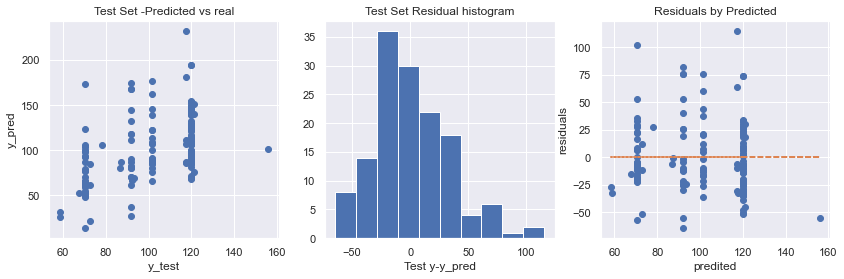

In [545]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test6, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test6 - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test6 - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')


In [546]:
print(mse(y_test6,y_pred))
print(mae(y_test6,y_pred))

1081.053911064268
25.62494457413236
